In [1]:
import time
import random
import numpy as np
import pulp as plp
#from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
"""
from gurobipy import *
import multiprocessing

def Model(weights, signed_matrix):

    objectivevalue=[]
    objs=[]
    solveTime=[]
    
    index=0 
    order=len(signed_matrix[index])

    ###############################################################################################
    opt_model = plp.LpProblem(name="Binary_Model",sense = plp.LpMinimize)

    x=[]
    for i in range(0,order):
        x.append(plp.LpVariable(lowBound=0,upBound=1, cat=plp.LpBinary, name='x'+str(i)))
    z={}    
    for (i,j) in (weights[index]):
        z[(i,j)]=plp.LpVariable(lowBound=0,upBound=1, cat=plp.LpBinary, name='z'+str(i)+','+str(j))
    ###############################################################################################
    OFV = 0
    for (i,j) in (weights[index]):
        OFV += z[(i,j)]

    opt_model.setObjective(OFV)

    for (i,j) in (weights[index]):
        opt_model.addConstraint( z[(i,j)] >= x[i] - ((weights[index])[(i,j)])*x[j] -\
                        (1-(weights[index])[(i,j)])/2)
        opt_model.addConstraint( z[(i,j)] >= -x[i] + ((weights[index])[(i,j)])*x[j] +\
                        (1-(weights[index])[(i,j)])/2)   

    ###############################################################################################
    
    start_time = time.time()
    status = opt_model.solve(solver = plp.getSolver('GUROBI_CMD'))#'COIN_CMD'))
    solveTime.append(time.time() - start_time) 

    ###############################################################################################

    varsdict = {}
    for v in opt_model.variables():
        varsdict[v.name] = v.varValue    
                    
    return float(opt_model.objective.value()), varsdict

def Prepare_Data(matrices):

    signed_matrices=[]
    unsigned_matrices=[]
    weights = []
    graphs=[]
    for signed_matrix in matrices:

        Graph=nx.from_numpy_matrix(signed_matrix)

        mapping=dict(zip(Graph.nodes(),range(len(Graph.nodes()))))
        Graph=nx.relabel_nodes(Graph,mapping) 

        graphs.append(Graph)

        signed_matrix = nx.to_numpy_matrix(Graph)
        unsigned_matrix = abs(signed_matrix)    

        weighted_edges=nx.get_edge_attributes(Graph, 'weight') 
        w={}
        for (u,v) in weighted_edges:
            if u<v:
                w[(u,v)] = weighted_edges[(u,v)]
            if u>v:
                w[(v,u)] = weighted_edges[(u,v)]

        signed_matrices.append(signed_matrix)
        unsigned_matrices.append(unsigned_matrix)
        weights.append(w)

    return graphs, weights, signed_matrices
"""
def color_nodes(G,variables):
    
    d = {}
    for key, value in variables.items():
        if "x" in key:
            #print(key[1:],value)
            d[int(key[1:])]=value

    var = dict(sorted(d.items()))
    
    node_colors=[]
    for key,value in var.items():
        if value==1:
            node_colors.append("Black")
        else:
            node_colors.append("Silver")
            
    attr = {}
    for (node,value),color in zip(G.nodes.data(),node_colors):
        #print(node,color)
        attr[node]=color
        
    nx.set_node_attributes(G, attr, 'color')
    
    return G

def Add_Weights(H,k):
    
    N = len(H.edges())

    m=int(round(k*N))
    n=int(round((1-k)*N))

    a = np.ones(n+m)
    a[:m] = -1
    np.random.shuffle(a)
    
    dic={}
    for e,value in zip(H.edges(),a):
        dic[e] = value
    
    nx.set_edge_attributes(H, dic,'weight')
    
    return H

In [2]:
def create_data(n,num):
    
    k = 0.5
    
    if num==1:
        G = nx.grid_2d_graph(n,n)
    if num==2:
        G = nx.triangular_lattice_graph(n,n)
    if num==3:
        G= nx.path_graph(n)

    N = len(G.nodes())
    
    m=int(round(k*N))
    n=int(round((1-k)*N))

    a = np.ones(N)
    a[:m] = -1
    np.random.shuffle(a)
    
    node_colors=[]
    for i in a:
        if i==1:
            node_colors.append("Silver")
        else:
            node_colors.append("Black")

    attr = {}
    for (node,value),color in zip(G.nodes.data(),node_colors):
        attr[node]=color

    nx.set_node_attributes(G, attr, 'color')
    
    G = Add_Weights(G,1.0)
    
    
    matrix = nx.to_numpy_matrix(G)
    g, weights, signed_matrix = Prepare_Data([matrix])

    fi,vr = Model(weights, signed_matrix)
    #frustrations.append(fi)
    G = color_nodes(G,vr)
    
    pos = nx.spring_layout(G, weight=None)
    nx.set_node_attributes(G,pos,'pos')
    

    return G

def Creation(n,choice):
    k = 0.5
    
    if choice==1:
        G = nx.grid_2d_graph(n,n)
    if choice==2:
        G = nx.triangular_lattice_graph(n,n)
    if choice==3:
        G= nx.path_graph(n)

    N = len(G.nodes())
    
    m = random.randrange(0,N)
    n = N-m

    a = np.ones(N)
    a[:m] = -1
    np.random.shuffle(a)
    
    node_colors=[]
    for i in a:
        if i==1:
            node_colors.append("Silver")
        else:
            node_colors.append("Black")

    attr = {}
    for (node,value),color in zip(G.nodes.data(),node_colors):
        attr[node]=color

    nx.set_node_attributes(G, attr, 'color')
    
    G = Add_Weights(G,1.0)
    
    #pos = nx.spring_layout(G, weight=None)
    #nx.set_node_attributes(G,pos,'pos')
    
    return G

In [3]:
import networkx as nx

G = Creation(10,1)

print(G.nodes())

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


In [4]:
def Plot2D(G,size=5):

    H0 = G.copy()
    pos =nx.get_node_attributes(H0,'pos')
    node_colors=nx.get_node_attributes(H0,'color')

    edge_colors = []
    for n1,n2,val in H0.edges.data():

        #print(n1,n2)
        if H0.nodes[n1]['color']==H0.nodes[n2]['color']:

            if H0.nodes[n1]['color'] ==H0.nodes[n2]['color'] == "Black":
                edge_colors.append("red")
                #negative +=1
            if H0.nodes[n1]['color'] ==H0.nodes[n2]['color'] == "Silver":
                edge_colors.append("green")
                #positive +=1
        else:
                edge_colors.append("lightgrey")

    attr2 = {}
    for edge,color in zip(H0.edges(),edge_colors):

        #print(edge,color)
        attr2[edge]=color

    nx.set_edge_attributes(H0, attr2, 'edge_color')
    
    edge_colors=nx.get_edge_attributes(H0,'edge_color')
    
        
    pos = nx.spring_layout(G, weight=None)

    fig, ax = plt.subplots(figsize=(size,size))
    nx.draw(H0,pos,node_size=50,edge_color=edge_colors.values(),node_color=node_colors.values(),with_labels=False)

In [5]:
def frustration_count(G):
    s = 0
    for n1,n2,val in G.edges.data():
        if G.nodes[n1]['color']==G.nodes[n2]['color']:
            s+=1
    return s

def color_of_frustration(H):
    
    positive=0
    negative=0

    for n1,n2,val in H.edges.data():
        
        G = H.copy() 
        color1 = G.nodes[n1]['color']
        color2 = G.nodes[n2]['color']
        if color1 == color2 or color2==color1:
            #print("true")
            if color1 == color2 == "Black":
                negative +=1
            if color1 == color2 == "Silver":
                positive +=1
                
    return positive,negative

def calculate_delta(G):
    
    p,n = color_of_frustration(G)
    
    if p>n:
        return int(np.sqrt((p-n)**2))
    else:
        return int(np.sqrt((n-p)**2))

In [6]:
import random
import math
from random import choice
from random import sample
import numpy.random as rn

#from sklearn.metrics import mean_squared_error

def random_neighbour(G):
 
    H = G.copy()
    
    random_node = sample(H.nodes(),1)[0]
    
    chosen_color = H.nodes[random_node]['color']
    if chosen_color == "Silver":
        H.nodes[random_node]['color'] = "Black"
    else:
        H.nodes[random_node]['color'] = "Silver"
    
    return H

def target_delta(state, target):
    
    new = calculate_delta(state)
    
    mse = np.abs(target-new)

    return mse

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p

def temperature(fraction):
    
    value = max(0.01, min(1, 1 - fraction))
    return value

def Annealing(G0,target, maxsteps=1000):

    
    state = G0.copy()
    cost_funct = target_delta
    
    cost = cost_funct(state,target)
    
    if cost == 0:
        return state
    
    for step in range(maxsteps):
        
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        
        new_state = random_neighbour(state)
        
        new_cost = cost_funct(new_state,target)
        
        if acceptance_probability(cost, new_cost, T) > rn.random():
            
            state, cost = new_state, new_cost
            if cost == 0:
                return state    
    return state

In [7]:
def Quench_Process(Gs):

    total=[]
    Delta = []
    for i in tqdm(range(len(Gs))):
        
        H = Gs[i].copy()
        
        res=[]
        res.append(frustration_count(H))
        deltas = []
        deltas.append(calculate_delta(H))
        
        G = H.copy()
        for k in range(1,500):
            
            nx.algorithms.connected_double_edge_swap(G, nswap=1)
            
            fr = frustration_count(G)
            res.append(fr)
            deltas.append(calculate_delta(G))

        total.append(res) 
        Delta.append(deltas)
        
    return np.array(total),np.array(Delta)

def Get_Probabilites(data,Edge,repeat):

    p_t=[]
    for t in range(len(data[0])):

        prob=[]
        for i in range(0,Edge):
            prob.append(np.count_nonzero(np.array(data[:,t]) == i))
        p_t.append(np.array(prob)/repeat)

    P_t = np.array(p_t)

    p_even=[]
    for l in P_t:
        p_even.append(l[::2])

    P_even = np.array(p_even)

    return P_t,P_even

def Get_Means(data):
    
    total = np.array(data)
    final = []
    for i in range(0,len(total[0])):
        final.append((np.mean(total[:,i]),np.std(total[:,i])))

    return np.array(final)

In [8]:
def Quench(Gs):
    

    total=[]
    
    for g0 in (Gs):
    
        specific_avg = []
        for i in tqdm(range(1000)):

            H = g0.copy()

            res=[]
            res.append(frustration_count(H))

            G = H.copy()
            for k in (range(1,1000)):

                nx.algorithms.connected_double_edge_swap(G, nswap=1)

                res.append(frustration_count(G))

            specific_avg.append(res)
        
        total.append(specific_avg) 
            
        
    return np.array(total)

# Testing

L = 180 f = 98 d = 82
p = 90 n = 8


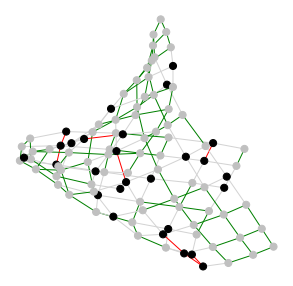

In [9]:
%matplotlib inline
#G = create_data(10,2)

G = Creation(10,1)

Plot2D(G,5)

edge = len(G.edges())

print("L =",edge,"f =",frustration_count(G),"d =",calculate_delta(G))

p,n = color_of_frustration(G)

print("p =",p,"n =",n)

In [10]:
G0_START = G

In [11]:
print(len(Creation(100,1).nodes()))

10000


In [12]:
import time
from tqdm import tqdm

Gs = []
start_time = time.time()
for i in tqdm(range(10000)):
    #print(Gs[i])
    #G = Creation(4,2)
    Gs.append(Creation(10,1))
print(time.time() - start_time) 


100%|██████████| 10000/10000 [00:09<00:00, 1005.67it/s]

9.94598388671875


In [13]:
from collections import Counter

avg = []
for gs in tqdm(Gs):
    
    f = frustration_count(gs)
    d = calculate_delta(gs)
    
    avg.append((f,d))
    
AVG = Counter(avg)

print(AVG)

  1%|          | 80/10000 [00:08<18:04,  9.15it/s]


KeyboardInterrupt: 

In [15]:
selected_gs = []
for gs in tqdm(Gs):
    if (frustration_count(gs),calculate_delta(gs)) == (370, 268):
        selected_gs.append(gs)
        if len(selected_gs) == 2:
            break

 87%|████████▋ | 874/1000 [18:32<02:40,  1.27s/it]


In [41]:
np.save("selected_gs_630_268.npy",selected_gs)

In [16]:
data = Quench(selected_gs)

100%|██████████| 1000/1000 [26:08<00:00,  1.57s/it]


In [42]:
np.save("data_630_268.npy",data)

In [14]:
selected_gs = np.load("selected_gs_630_268.npy")
data = np.load("data_630_268.npy")

In [15]:
def Get_Probabilites2(data,Edge,repeat):
    
    avg_P_t = []
    for a in data:
        p_t=[]
        for t in range(len(a[0])):

            prob=[]
            for i in range(0,Edge):
                prob.append(np.count_nonzero(np.array(a[:,t]) == i))
            p_t.append(np.array(prob)/repeat)

        P_t = np.array(p_t)
        avg_P_t.append(P_t)

    return np.array(avg_P_t)


In [16]:
avg_P_t = Get_Probabilites2(data,630,1000)

print(np.shape(avg_P_t))

(2, 1000, 630)


In [17]:
#avg_P_t[:,5]

avg_P = []
for t in range(1000):
    avg_p = []
    for i in range(630):
        #print(i)
        #print(avg_P_t[:,t,i],np.mean(avg_P_t[:,t,i]),np.std(avg_P_t[:,t,i]))
        avg_p.append((np.mean(avg_P_t[:,t,i]),np.std(avg_P_t[:,t,i])))
    avg_P.append(avg_p)
    #break
    #print(avg_P_t[i,5])
    #avg_p.append(np.mean(avg_P_t[:,5][0]))

In [18]:
p_even=[]
for l in avg_P:
    p_even.append(l[::2])

P_even = np.array(p_even)

In [19]:
f = open("/home/sven/Desktop/p630_268.txt",'r')

p630_268 =[]
for line in f:
    
    #p630.append(float((line.rstrip("\n"))))
    if len(line.rstrip("\n"))==1:
            p630_268.append(0)
    else:
        p630_268.append(float((line.rstrip("\n")).replace("*^","e")))
p630_268 = np.array(p630_268)
#p360_47 = np.delete(p360_47, 0)
p630_268 = np.delete(p630_268, -1)

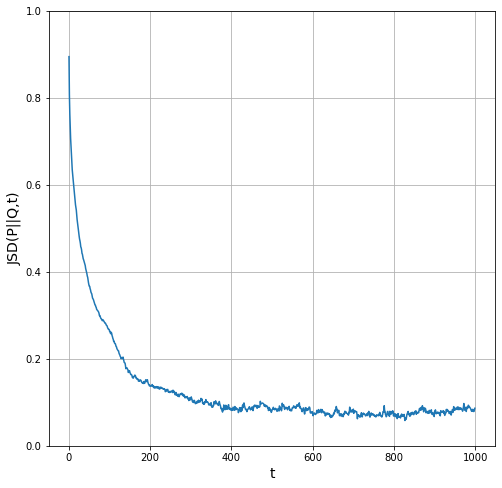

In [23]:
from scipy.spatial.distance import jensenshannon

"""
p = np.array(data1[-1])[::2]
q = np.round(p165,2)[::2]

print(len(p),len(q))

js_pq1 = jensenshannon(p,q,base=2)
print('JS(Q || P) Distance: %.3f' % js_pq1)
"""
%matplotlib inline

#p = np.array(d[0])[::2]
#q = np.round(p30_13,2)[::2]

#print(len(p),len(q))

#JS =[]
#JS = np.full(100, 0)
#JS = np.zeros((1000), dtype=float)
JS = np.empty(100)

JS = []

for i in range(len(avg_P)):
    
    p = np.array(p630_268)[::2]
    q = np.array([i for i,j in avg_P[i]])[::2]
    
    #print(p,q)
    
    js_pq1 = jensenshannon(p,q,base=2)
    #print(i)
    JS.append(js_pq1)
    #print('JS(Q || P) Distance: %.3f' % js_pq1,JS[i])
    
fig,ax = plt.subplots(figsize=[8,8])

ax.plot([i for i in range(len(JS))],JS)
ax.grid()
ax.set_ylim(0,1)

ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('JSD(P||Q,t)', fontsize=14)

plt.show()

In [27]:
import random
import matplotlib
import tkinter as Tk
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.widgets import TextBox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

matplotlib.use('TkAgg')

root = Tk.Tk()
root.wm_title("Embedding in TK")
fig = plt.Figure(figsize=(15,15))
canvas = FigureCanvasTkAgg(fig, root)
canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)


###############################################

ax=fig.add_subplot(111)
fig.subplots_adjust(bottom=0.25)

#fig.suptitle('L='+str(l)+', d='+str(k), fontsize=16)

t=0

x = [i for i in range(len(avg_P[t]))]
y = np.array([i for i,j in avg_P[t]])
y_err = np.array([j for i,j in avg_P[t]])

#ax.errorbar(x,y,y_err,capsize=3)
#l12  = ax.fill_between(x, y - y_err, y + y_err,facecolor="blue",alpha=0.2)#, alpha=0.25)#, edgecolor="black")


x = [i*2+1 for i in range(len(P_even[t]))]
y = np.array([i for i,j in P_even[t]])
y_err = np.array([j for i,j in P_even[t]])

ax.errorbar(x,y,y_err,capsize=3)
l12  = ax.fill_between(x, y - y_err, y + y_err,facecolor="red",alpha=0.2)#, alpha=0.25)#, edgecolor="black")


#ax.plot([i for i in range(len(p30_13))],p30_13,color="red")
ax.plot([i*2+1 for i in range(len(p630_268[::2]))], p630_268[::2],color="red")
ax.scatter([i*2+1 for i in range(len(p630_268[::2]))], p630_268[::2],color="red")


ax.set_ylim(0,0.2)
ax.set_xlim(300,450)
ax.set_xlabel("f")
ax.set_ylabel("P(f)")
ax.grid()

###############################################
ax_time = fig.add_axes([0.12, 0.1, 0.78, 0.03])
s_time = Slider(ax_time, 'Time', 0, 999, valinit=0)

tekstić = ax.text(0.05, 0.95, s_time.val, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
###############################################



from mpl_toolkits.axes_grid.inset_locator import inset_axes

# this is an inset axes over the main axes
inset_axes = inset_axes(ax, 
                    width="30%", # width = 30% of parent_bbox
                    height=2.0, # height : 1 inch
                    loc=1)
#n, bins, patches = plt.hist(s, 400)
xs = np.linspace(0,1)
#inset_axes.plot(xs,np.sin(xs))
inset_axes.plot([i for i in range(len(JS))],JS)
inset_axes.scatter(t,JS[t])

inset_axes.set_xscale('log')
inset_axes.set_ylim(0,1)
inset_axes.set_xlabel('t', fontsize=14)
inset_axes.set_ylabel('JSD(P||Q,t)', fontsize=14)
inset_axes.grid()
#line2 = plt.axvline(x=t,linestyle="-",color="red")
#line3 = plt.axhline(y=data3[t,0],linestyle="-",color="red")
#plt.ylabel('f(t)', fontsize=10)
#plt.xlabel('t', fontsize=10)
#plt.grid()


###############################################

def update(val):
    
    ax.cla()
    ax.set_ylim(0,0.2)
    ax.set_xlim(300,450)
    ax.set_xlabel("f")
    ax.set_ylabel("P(f)")
    ax.grid()

    value = int(s_time.val)

    #l11.set_ydata([i for i,j in avg_P[value]])
    
        
    x = [i for i in range(len(avg_P[value]))]
    y = np.array([i for i,j in avg_P[value]])
    y_err = np.array([j for i,j in avg_P[value]])
    
    #ax.errorbar(x,y,y_err,capsize=3)
    #ax.fill_between(x, y - y_err, y + y_err,facecolor="blue",alpha=0.2)
    
    
    x = [i*2+1 for i in range(len(P_even[value]))]
    y = np.array([i for i,j in P_even[value]])
    y_err = np.array([j for i,j in P_even[value]])
    
    ax.errorbar(x,y,y_err,capsize=3)
    ax.fill_between(x, y - y_err, y + y_err,facecolor="red",alpha=0.2)
    
    #ax.plot([i for i in range(len(p30_13))],p30_13,color="red")
    ax.plot([i*2+1 for i in range(len(p630_268[::2]))],p630_268[::2],color="red")
    ax.scatter([i*2+1 for i in range(len(p630_268[::2]))], p630_268[::2],color="red")
    #l12.set_y
    
    inset_axes.cla()
    inset_axes.plot([i for i in range(len(JS))],JS)
    inset_axes.scatter(value,JS[value])
    inset_axes.set_xscale('log')
    inset_axes.set_ylim(0,1)
    inset_axes.set_xlabel('t', fontsize=14)
    inset_axes.set_ylabel('JSD(P||Q,t)', fontsize=14)
    inset_axes.grid()
    
    fig.canvas.draw_idle()

from tkinter import Button
Button(root, text="Quit", command=root.destroy).pack()
    
    
s_time.on_changed(update)

Tk.mainloop()

# MAXIMUM FRUSTRATION

In [30]:
def create_MAX_data(n,num):
    
    k = 0.5
    
    if num==1:
        G = nx.grid_2d_graph(n,n)
    if num==2:
        G = nx.triangular_lattice_graph(n,n)
    if num==3:
        G= nx.path_graph(n)

    N = len(G.nodes())
    
    m=int(round(k*N))
    n=int(round((1-k)*N))

    a = np.ones(N)
    a[:m] = -1
    np.random.shuffle(a)
    
    node_colors=[]
    for i in a:
        if i==1:
            node_colors.append("Silver")
            #node_colors.append("Black")
        else:
            node_colors.append("Black")
            #node_colors.append("Silver")

    attr = {}
    for (node,value),color in zip(G.nodes.data(),node_colors):
        attr[node]=color

    nx.set_node_attributes(G, attr, 'color')
    
    G = Add_Weights(G,1.0)
    
    """
    matrix = nx.to_numpy_matrix(G)
    g, weights, signed_matrix = Prepare_Data([matrix])

    vr = Max_Model(weights, signed_matrix)
    #frustrations.append(fi)
    G = color_nodes(G,vr)
    
    pos = nx.spring_layout(G, weight=None)
    nx.set_node_attributes(G,pos,'pos')
    """

    return G

In [70]:
import random
import math
from random import choice
from random import sample
import numpy.random as rn

from sklearn.metrics import mean_squared_error

def random_neighbour(G):
 
    H = G.copy()
    
    random_node = sample(H.nodes(),1)[0]
    
    chosen_color = H.nodes[random_node]['color']
    if chosen_color == "Silver":
        H.nodes[random_node]['color'] = "Black"
    else:
        H.nodes[random_node]['color'] = "Silver"
    
    return H

def target_frustration(state,target):#, target):
    
    #new = calculate_delta(state)
    
    new = frustration_count(state)
    
    mse = np.abs(target-new)

    return mse

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p

def temperature(fraction):
    
    value = max(0.01, min(1, 1 - fraction))
    return value

def Annealing2(G0, target,maxsteps=200):

    
    state = G0.copy()
    cost_funct = target_frustration
    
    cost = cost_funct(state,target)
    
    if cost == 0:
        return state
    
    for step in range(maxsteps):
        
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        
        new_state = random_neighbour(state)
        
        new_cost = cost_funct(new_state,target)
        
        if acceptance_probability(cost, new_cost, T) > rn.random():
            
            state, cost = new_state, new_cost
            #print(frustration_count(state),cost)
            if cost == 0:
                return state    
    return state

L = 165 f = 142 d = 14
p = 78 n = 64


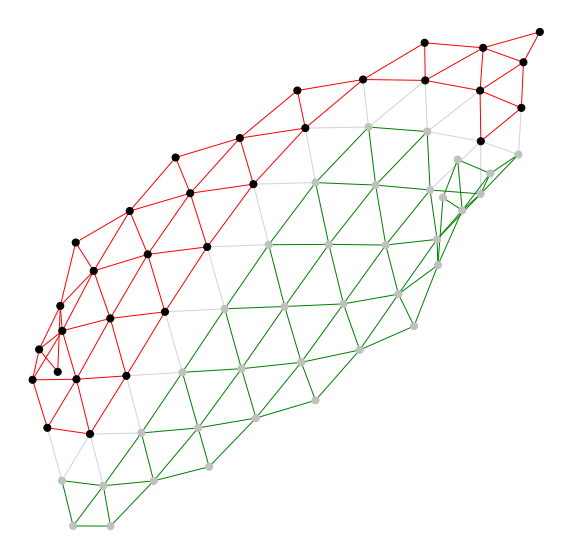

In [108]:

%matplotlib inline
#G = create_data(10,2)


G = create_MAX_data(10,2)

#G =  random_neighbour(G)

G = Annealing2(G,len(G.edges()))


Plot2D(G,10)

edge = len(G.edges())

print("L =",edge,"f =",frustration_count(G),"d =",calculate_delta(G))

p,n = color_of_frustration(G)



print("p =",p,"n =",n)

In [110]:
def Quench(G0):
    

    total=[]
    
    #d0 = calculate_delta(G0)
    for i in tqdm(range(1000)):
        
        H = G0.copy()
        
        res=[]
        res.append(frustration_count(H))
        
        G = H.copy()
        for k in (range(1,1000)):
            
            nx.algorithms.connected_double_edge_swap(G, nswap=1)

            res.append(frustration_count(G))
            
            """
            d = calculate_delta(G)
            if d != d0:
                print("Delta changed!")
                return 0
            """
            
        total.append(res) 
        
    return np.array(total),G

In [111]:
data,G_final = Quench(G)

P_t,P_even = Get_Probabilites(data,edge,1000)

Means  = Get_Means(data)

100%|██████████| 1000/1000 [07:31<00:00,  2.21it/s]


In [116]:
np.save("MAX_L165F142D14.npy",data)

In [113]:
#edge = L

edge = len(G.edges())

from sympy import *
f0 = 142

t = symbols('t')
x = symbols('x', cls=Function)
L = symbols('L', real=True)
d = symbols('d', real=True)

gsol = dsolve(x(t).diff(t) - ((1 - 2*L)*x(t) + L*(L - 1) + d**2)/(L*(L - 1)), x(t),ics={x(0): f0})

l=edge
k=14
sol = gsol.subs({L: l,d:k})
lmbd_sol = lambdify(t, sol.rhs)

In [114]:
data1 = P_t
data2 = P_even
data3 = Means

In [115]:
import random
import matplotlib
import tkinter as Tk
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.widgets import TextBox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

matplotlib.use('TkAgg')

root = Tk.Tk()
root.wm_title("Embedding in TK")
fig = plt.Figure(figsize=(10,5))
canvas = FigureCanvasTkAgg(fig, root)
canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)


###############################################

ax=fig.add_subplot(121)
fig.subplots_adjust(bottom=0.25)

fig.suptitle('L='+str(l)+', d='+str(k), fontsize=16)

t=0
l11, = ax.plot([i for i in range(len(data1[t]))], data1[t],alpha=0.5)
l12, = ax.plot([i*2 for i in range(len(data2[t]))], data2[t], alpha=0.5,lw=2)
line = ax.axvline(x=data3[t,0],linestyle="--",color="green",alpha=0.5)
#ax.plot([i for i in range(len(p30))], p30,color="red",alpha=0.1)
#ax.plot([i*2 for i in range(len(p30[::2]))], p30[::2],color="red")
ax.set_ylim(0,1)

ax.set_xlabel("f")
ax.set_ylabel("P(f)")
ax.grid()

###############################################
ax_time = fig.add_axes([0.12, 0.1, 0.78, 0.03])
s_time = Slider(ax_time, 'Time', 0, 999, valinit=0)

tekstić = ax.text(0.05, 0.95, s_time.val, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
###############################################

ax2=fig.add_subplot(122)

ax2.errorbar([i for i in range(len(data3[:,0]))],data3[:,0],data3[:,1],alpha=0.1,color="blue")
ax2.plot([i for i in range(len(data3[:,0]))],data3[:,0],color="blue")
line2 = ax2.axvline(x=t,linestyle="-",color="red")
line3 = ax2.axhline(y=data3[t,0],linestyle="-",color="red")

    
xs = np.linspace(0,1000,1000)
ax2.plot(xs,lmbd_sol(xs),linestyle="--",color="green")


ax2.set_xlabel("t")
ax2.set_ylabel("f(t)")
ax2.set_ylim(0,edge+10)
ax2.grid()


###############################################

def update(val):

    value = int(s_time.val)

    l11.set_ydata(data1[value])
    l12.set_ydata(data2[value])
    line.set_xdata(data3[value,0])
    
    tekstić.set_text("t="+str(value)+", E[f]="+str(data3[value,0]))#+"-> "+str(np.round(lmbd_sol(value),2)))

    line2.set_xdata(value)
    line3.set_ydata(data3[value,0])
    
    fig.canvas.draw_idle()

from tkinter import Button
Button(root, text="Quit", command=root.destroy).pack()
    
    
s_time.on_changed(update)

Tk.mainloop()